In [294]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.utils.data as data
import torch.nn.functional as F

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, accuracy_score, confusion_matrix, classification_report

from torch.utils.data import Dataset




In [295]:
torch.cuda.is_available()

True

In [288]:
channels = ['Fp1',
 'F7',
 'F8',
 'T4',
 'T6',
 'T5',
 'T3',
 'Fp2',
 'O1',
 'P3',
 'Pz',
 'F3',
 'Fz',
 'F4',
 'C4',
 'P4',
 'POz',
 'C3',
 'Cz',
 'O2']

In [432]:
df = pd.read_pickle('corr_dataset.pkl')

df.head()

,UID,Condition,Correlation
0,9003_RSEC_0,HC,"[[1.0, 0.90661967, 0.72530466, 0.38593653, 0.1..."
1,9003_RSEC_1,HC,"[[1.0, 0.87269574, 0.6468242, 0.5850507, 0.407..."
2,9003_RSEC_2,HC,"[[1.0, 0.8655385, 0.08705698, 0.06501593, 0.11..."
3,9003_RSEC_3,HC,"[[1.0, 0.8236727, -0.031504884, 0.08421207, 0...."
4,9003_RSEC_4,HC,"[[1.0, 0.91261464, 0.7787058, 0.74198246, 0.70..."


In [360]:
g = df.groupby('Condition')
df_usampling = g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True)

df_usampling

,UID,Condition,Correlation
0,9246_RSEO_4,AD,"[[0.99999994, 0.0744841, 0.23836455, 0.3298629..."
1,9202_RSEC_3,AD,"[[1.0, 0.61405474, 0.5726608, 0.34963313, 0.36..."
2,9231_RSEO_3,AD,"[[1.0, 0.9228951, 0.83339787, 0.5848535, 0.381..."
3,9214_RSEC_3,AD,"[[0.9999999, 0.72573376, 0.58829576, 0.3058726..."
4,9206_RSEO_1,AD,"[[1.0, 0.5989681, 0.7013047, 0.005209636, 0.01..."
...,...,...,...
515,9058_RSEO_3,HC,"[[1.0, 0.77028584, 0.8150006, 0.40380317, 0.26..."
516,9053_RSEO_0,HC,"[[1.0, 0.8603323, 0.62266636, 0.33616516, 0.37..."
517,9110_RSEC_2,HC,"[[1.0, 0.8525059, -0.44501698, -0.21845794, 0...."
518,9016_RSEO_2,HC,"[[1.0, 0.9554513, 0.9570184, 0.9330426, 0.8995..."


In [361]:
X = np.stack(df_usampling["Correlation"].ravel())
X.shape

(520, 20, 20)

c:\Users\jimmy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Condition', ylabel='count'>

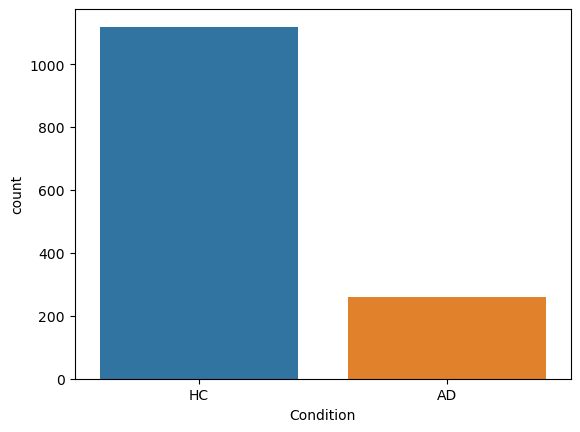

In [433]:
sns.countplot(df["Condition"])

In [363]:
# Binary enconding 
Y = df_usampling["Condition"].to_numpy()

l_encoder = LabelEncoder()
i_encoded = l_encoder.fit_transform(Y)
print(i_encoded)

Y = i_encoded.reshape(1, -1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [330]:
# Onehot enconding 
o_encoder = OneHotEncoder(sparse=False)
i_encoded = i_encoded.reshape(len(i_encoded), 1)
o_encoded = o_encoder.fit_transform(i_encoded)
print(o_encoded)

#Y = o_encoded

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [365]:
Y = Y.T

In [200]:
X = Variable(torch.from_numpy(X.astype(np.float32)), requires_grad=False)
Y = Variable(torch.from_numpy(Y.astype(np.float32)), requires_grad=False)

In [366]:
X_train, X_test, y_train, y_test = train_test_split(   
     X, Y, test_size=0.2, random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(   
#     X_train, y_train, test_size=0.1, random_state=42)

In [184]:
tags_train = l_encoder.inverse_transform(y_train)
tags_test = l_encoder.inverse_transform(y_test)

c:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IndexError: arrays used as indices must be of integer (or boolean) type

c:\Users\jimmy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\jimmy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


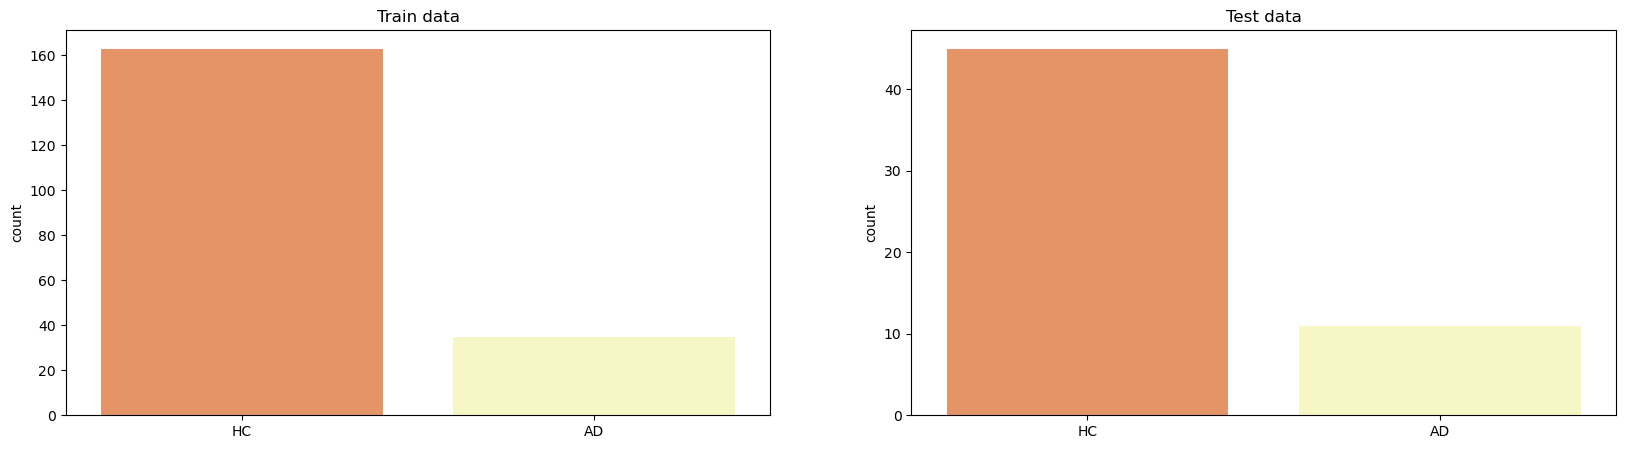

In [185]:
colors = sns.color_palette('Spectral', 3)
palette = {mode: color for mode, color in zip(["HC", "AD", "MCI"], colors)}

fig, ax = plt.subplots(1,2,figsize=(20,5))


sns.countplot(tags_train, ax=ax[0], palette=palette)
ax[0].set_title("Train data")

sns.countplot(tags_test, ax=ax[1], palette=palette);
ax[1].set_title("Test data");

In [202]:
data_dist = {"train" : len(X_train), "test" : len(X_test), "val" : len(X_val)}
data_dist

{'train': 220, 'test': 56, 'val': 22}

In [83]:
from torchsummary import summary

In [248]:
# Network Initialization 

model = nn.Sequential(
          nn.Conv2d(1,16,3),
          nn.Conv2d(16,16,3),
          nn.MaxPool2d(2),
          nn.Dropout(),
          nn.Conv2d(16,32,3),
          nn.Conv2d(32,32,3),
          nn.MaxPool2d(3),
          nn.Dropout(),
          nn.Flatten(start_dim=0),
          nn.Linear(32, 160),
          nn.ReLU(),
          nn.Linear(160, 1),
          nn.Softmax(0)
        )
model.to("cuda")

#summary(model, (1,20,20))

Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Dropout(p=0.5, inplace=False)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (6): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (7): Dropout(p=0.5, inplace=False)
  (8): Flatten(start_dim=0, end_dim=-1)
  (9): Linear(in_features=32, out_features=160, bias=True)
  (10): ReLU()
  (11): Linear(in_features=160, out_features=1, bias=True)
  (12): Softmax(dim=0)
)

In [249]:
train_ds = torch.utils.data.TensorDataset(X_train, y_train)
validation_ds = torch.utils.data.TensorDataset(X_test, y_test)


train_ds_loader = torch.utils.data.DataLoader(train_ds,shuffle=True)
val_ds_loader = torch.utils.data.DataLoader(validation_ds,shuffle=True)

In [250]:
import torch.optim as optim


loss_fn=nn.BCEWithLogitsLoss()
optimizer=optim.SGD(model.parameters(),lr=0.1,momentum=0.9)

In [251]:
def accuracy(predictions, labels):
    classes = torch.argmax(predictions, dim=0)
    #print(classes)
    return torch.mean((classes == labels).float())

In [253]:
num_epoch = 30 
train_losses=[]
valid_losses=[]

for epoch in range(1,num_epoch+1):
  train_loss=0.0
  valid_loss=0.0
a
  train_f1 =0.0
  train_acc = 0.0

  model.train()
  for img,lbl in train_ds_loader:
    img=img.cuda()
    lbl=lbl.cuda()
    #img=img.cpu()
    #lbl=lbl.cpu()

    optimizer.zero_grad()
    predict=model(img)
    loss=loss_fn(predict,lbl.flatten())
    loss.backward()
    optimizer.step()

    train_loss+=loss.item()*img.size(0)

    label = lbl.flatten().cpu()
    prediction = predict.cpu().detach().numpy()
    print((label, prediction))
    train_acc += accuracy_score(label, prediction)
    train_f1 += f1_score(label, prediction)

  model.eval()
  for img,lbl in val_ds_loader:
    img=img.cuda()
    lbl=lbl.cuda()
    #img=img.cpu()
    #lbl=lbl.cpu()

    predict=model(img)
    loss=loss_fn(predict,lbl.flatten())

    valid_loss+=loss.item()*img.size(0)

  train_loss=train_loss/len(train_ds_loader.sampler) 
  valid_loss=valid_loss/len(val_ds_loader.sampler)

  train_acc=train_acc/train_f1
  
  train_f1=train_f1/len(val_ds_loader.sampler)
  train_losses.append(train_loss)
  valid_losses.append(valid_loss)

  print('Epoch:{} Train Loss:{:.4f} valid Losss:{:.4f} Train Accuracy:{:.4f} Train F1:{:.4f}'.format(epoch,train_loss,valid_loss, train_acc, train_f1))    

(tensor([1.]), array([1.], dtype=float32))
(tensor([0.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([0.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([0.]), array([1.], dtype=float32))
(tensor([1.]), array([1.], dtype=float32))
(tensor([0.]), array([1.], dtype=float32))
(tensor([1.

KeyboardInterrupt: 

In [410]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
param_grid={'C':[1, 10, 100, 1000],'gamma':[0.1,0.0001],'kernel':['rbf','poly']}

svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [411]:
X_test.shape

(104, 20, 20)

In [412]:
X_train_reshape = X_train.reshape(416,400)
X_test_reshape = X_test.reshape(104,400)

In [ ]:
model.fit(X_train_reshape,y_train)

In [406]:
y_pred=model.predict(X_test_reshape)


accuracy_score(y_test, y_pred)


0.7884615384615384

In [376]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,

In [414]:
labels = set(df["Condition"])
labels = ['AD', 'HC']

In [415]:
tick_labels = labels
n_classes = len(labels)
def showClassficationReport(y_pred, y_true, top_n = 1):
    # Loop on each generator batch and predict

    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(n_classes))

    conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False, 
                cmap=plt.cm.jet, xticklabels=tick_labels, yticklabels=tick_labels,
                ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix')
    plt.show()
 
    class_report = classification_report(y_true, y_pred)
    return class_report

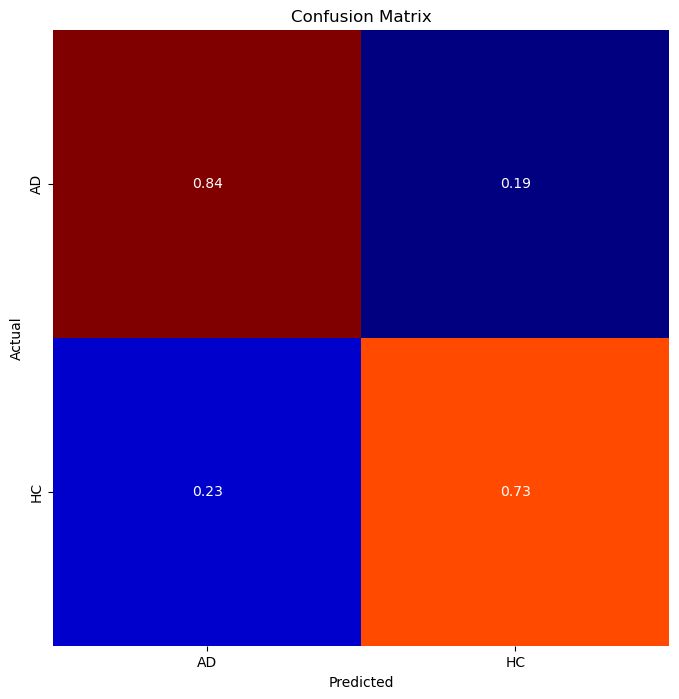

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        56
           1       0.80      0.73      0.76        48

    accuracy                           0.79       104
   macro avg       0.79      0.78      0.79       104
weighted avg       0.79      0.79      0.79       104



In [416]:
class_report = showClassficationReport(y_pred , y_test)
print(class_report)

In [427]:
# Random forest 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_reshape,y_train)



y_pred = clf.predict(X_test_reshape)

accuracy_score(y_test, y_pred)

C:\Users\jimmy\AppData\Local\Temp\ipykernel_5264\1228826906.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_reshape,y_train)


0.6634615384615384

# Average matrices

In [280]:
hc_idx = list(np.where(df["Condition"] == "HC")[0])
ad_idx = list(np.where(df["Condition"] == "AD")[0])

In [282]:
corr_hc = np.zeros((20,20))
corr_ad = np.zeros((20,20))

In [284]:
for i in hc_idx: 
    corr_hc += X[i]
corr_hc = corr_hc/len(hc_idx)
for i in ad_idx: 
    corr_ad += X[i]

corr_ad = corr_ad/len(ad_idx)

<AxesSubplot:>

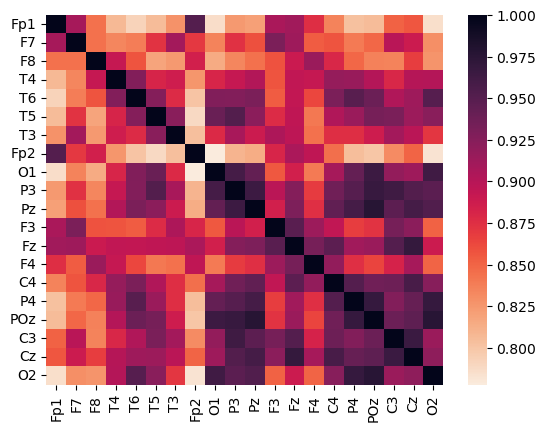

In [289]:
cmap = sns.cm.rocket_r

sns.heatmap(corr_hc, cmap=cmap, vmax=1, xticklabels=channels, yticklabels=channels)

<AxesSubplot:>

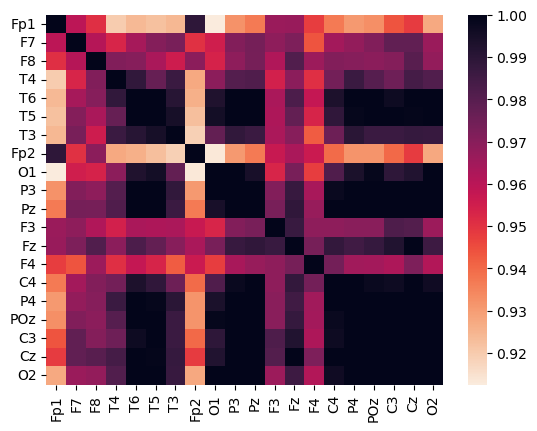

In [291]:
sns.heatmap(corr_ad, cmap=cmap, vmax=1, xticklabels=channels, yticklabels=channels)

<AxesSubplot:>

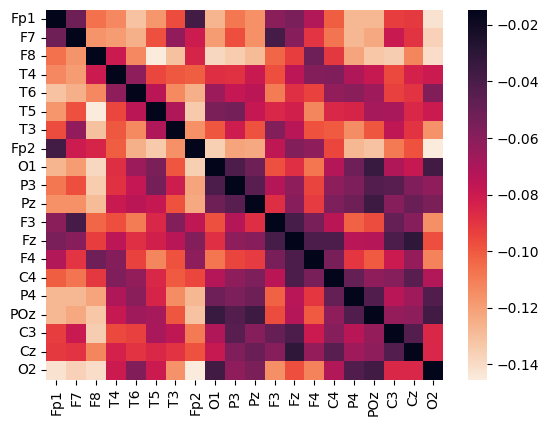

In [293]:
sns.heatmap((corr_hc-corr_ad), cmap=cmap, xticklabels=channels, yticklabels=channels)